In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('acc_gyro.txt',delim_whitespace=True)
#print(df[['time','accX','accY']])
print(df.columns)

# ax = df.plot(x='time',y='accX',figsize=(15,3))
# ax = df.plot(x='time',y='accY',figsize=(15,3))
# ax = df.plot(x='time',y='accZ',figsize=(15,3))
#df.plot(x='time',y='accZ',ax=ax,figsize=(15,10))
#ax = df.plot(x='time',y='pitch',ax=ax)
#ax = df.plot(x='time',y='roll',ax=ax)
#df.plot(x='time',y='yaw',ax=ax,figsize=(15,10))
#plt.plot(figsize=(15,10))

Index([u'time', u'accX', u'accY', u'accZ', u'pitch', u'roll', u'yaw'], dtype='object')


In [2]:
def threshold(dfCol,per=0.1):
    odfCol = dfCol
    maxX = max(dfCol[4:])
    thres = per*maxX

    for i,x in enumerate(dfCol):
        if(abs(x) > abs(thres)):
            odfCol[i] = 1
        else:
            odfCol[i] = 0

    return odfCol

def thresholdVal(dfCol,val=0.1):
    maxX = max(dfCol)
    print(maxX)
    thres = np.var(dfCol)*val

    for i,x in enumerate(dfCol):
        if(abs(x) > abs(thres)):
            
            dfCol[i] = 1
        else:
            dfCol[i] = 0

    return dfCol

def SmoothValMean(dfCol,size=5):
    idf = dfCol.rolling(window=size,center=True).mean()
    return idf

def SmoothValMedian(dfCol,size=5):
    idf = dfCol.rolling(window=size,center=True).median()
    return idf

def RollMax(dfCol,size=5):
    idf = dfCol.rolling(window=size,center=True).max()
    return idf

def makeTimeWindow(indf,attr,MaximSize=5,MeanSize=5,thres=.1,plot=False):
    #make a copy of the accX value
    if(plot):
        indf.plot(x='time',y=attr,figsize=(15,5))

    dy = np.gradient(indf[attr],2)
    indf['dy'] = dy
    if(plot):
        indf.plot(x='time',y='dy',figsize=(15,5))

    indf['dy'] = SmoothValMean(indf.dy.copy(),MeanSize)
    indf['thres'] = threshold(indf.dy.copy(),.1)
    if(plot):
        indf.plot(x='time',y='thres',figsize=(15,5))
    indf['window'] = RollMax(indf.thres.copy(),MaximSize)
    #axes = indf.plot(x='time',y='thres',figsize=(15,5))
    if plot:
        axes = indf.plot(x='time',y='window',figsize=(15,5))
        axes.set_ylim([0,2])
    
    return indf.window

In [3]:
df['smoothX'] = makeTimeWindow(df.copy(),'accX',MeanSize=6,MaximSize=12,thres=.1,plot=False)

In [4]:
df['smoothY'] = makeTimeWindow(df.copy(),'accY',MeanSize=6,MaximSize=20,thres=.1,plot=False)

In [5]:
df['smoothZ'] = makeTimeWindow(df.copy(),'accZ',MeanSize=6,MaximSize=20,thres=.1,plot=False)

In [6]:
df['smoothP'] = makeTimeWindow(df.copy(),'pitch',MeanSize=7,MaximSize=20,thres=.1,plot=False)

In [7]:
df['smoothR'] = makeTimeWindow(df.copy(),'roll',MeanSize=9,MaximSize=10,thres=.1,plot=False)

In [8]:
df['smoothYaw'] = makeTimeWindow(df.copy(),'yaw',MeanSize=9,MaximSize=10,thres=.1,plot=False)

In [9]:
print(df.shape[0])
df['window'] = 0
for i in range(0,df.shape[0]):
    if(df.smoothX[i] == 1 or df.smoothY[i]==1 or df.smoothZ[i]==1 or df.smoothP[i]==1 or df.smoothR[i]==1 or df.smoothYaw[i]==1):
        df.window[i] = 1
    if( i%100 == 0):
        print(i)

        

1250
0


C:\Users\sdash\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


100
200
300
400
500
600
700
800
900
1000
1100
1200


In [10]:
print(df.shape[0])

print(df.columns)

1250
Index([u'time', u'accX', u'accY', u'accZ', u'pitch', u'roll', u'yaw',
       u'smoothX', u'smoothY', u'smoothZ', u'smoothP', u'smoothR',
       u'smoothYaw', u'window'],
      dtype='object')


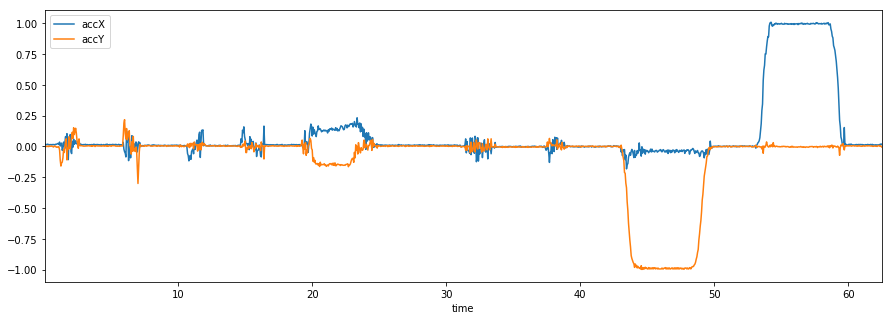

In [11]:
w =15
h=5

ax = df.plot(x='time',y='accX',figsize=(w,h))
ax = df.plot(x='time',y='accY',figsize=(w,h),ax=ax)
# ax = df.plot(x='time',y='accZ',figsize=(w,h)#,ax=ax)
# ax = df.plot(x='time',y='pitch',figsize=(w,h))=#,ax=ax)
# ax = df.plot(x='time',y='roll',figsize=(w,h))#,ax=ax)
# ax = df.plot(x='time',y='yaw',figsize=(w,h))#,ax=ax)
# ax = df.plot(x='time',y='window',figsize=(w,h))#,ax=ax)

#plt.savefig("myFile")

#ax.set_ylim([0,2])

In [12]:
import math

columns = ['accX','accY','accZ','pitch','roll','yaw']
result = pd.DataFrame(columns=columns)
#for pitch
tmp_df = df
#tmp_df.plot(x='time',y='window',figsize=(15,1))
tmp_df['grad'] = np.gradient(tmp_df.window)
#tmp_df.plot(x='time',y='grad',figsize=(15,1))

#print(tmp_df.grad)
ix = tmp_df[tmp_df.grad > 0]
iy = tmp_df[tmp_df.grad < 0]

ix = ix[ix.index%2 == 0]
iy = iy[iy.index%2 == 0]

pitch = pd.Series()
for i in range(0,12):
    
    x = df[ix.index[i]:iy.index[i]]
    res_pitch = (np.trapz(x.pitch,x.time))
    pitch.set_value(i,math.degrees(res_pitch))
    print("index: " + str(ix.index[i]) + "-" + str(iy.index[i]) + "::::  "+str(math.degrees(res_pitch)))

result.pitch = pitch
print(result['pitch'])

index: 10-62::::  -1.00636131148
index: 104-154::::  0.0423634752099
index: 206-246::::  -0.227657874321
index: 286-342::::  -0.253374171088
index: 374-420::::  9.46101892014
index: 446-498::::  -9.79400996572
index: 618-676::::  2.64995770552
index: 740-786::::  -0.256078806901
index: 848-904::::  91.307922716
index: 950-1006::::  -90.2472417554
index: 1052-1098::::  0.146050227892
index: 1154-1208::::  -2.10034941448
0     -1.006361
1      0.042363
2     -0.227658
3     -0.253374
4      9.461019
5     -9.794010
6      2.649958
7     -0.256079
8     91.307923
9    -90.247242
10     0.146050
11    -2.100349
Name: pitch, dtype: float64


In [16]:
import math

#for roll
tmp_df = df
tmp_df['grad'] = np.gradient(tmp_df.window)

#print(tmp_df.grad)
ix = tmp_df[tmp_df.grad > 0]
iy = tmp_df[tmp_df.grad < 0]

ix = ix[ix.index%2 == 0]
iy = iy[iy.index%2 == 0]

roll = pd.Series()
for i in range(0,12):
    x = df[ix.index[i]:iy.index[i]]
    res_roll = np.trapz(x.roll,x.time)
    roll.set_value(i,math.degrees(res_roll)) 

result.roll = roll
print(result.roll)

0     -0.272638
1     -1.314107
2     -0.788289
3      0.093048
4      5.526550
5     -9.375685
6      0.182487
7     -0.215376
8     -5.082878
9      3.189063
10    96.118533
11   -91.928200
Name: roll, dtype: float64


In [17]:
#for pitch
tmp_df = df
#tmp_df.plot(x='time',y='window',figsize=(15,1))
tmp_df['grad'] = np.gradient(tmp_df.window)
#tmp_df.plot(x='time',y='grad',figsize=(15,1))

#print(tmp_df.grad)
ix = tmp_df[tmp_df.grad > 0]
iy = tmp_df[tmp_df.grad < 0]

ix = ix[ix.index%2 == 0]
iy = iy[iy.index%2 == 0]

yaw = pd.Series()
for i in range(0,12):
    
    x = df[ix.index[i]:iy.index[i]]
    res_yaw = np.trapz(x.yaw,x.time)
    yaw.set_value(i,math.degrees(res_yaw))
    
result.yaw = yaw
print(result.yaw)


0     -1.461611
1      1.296604
2     -1.555110
3      2.407524
4     -4.514550
5      3.383318
6     89.773668
7    -88.301142
8     -4.068246
9      3.115502
10    -4.171722
11     2.611281
Name: yaw, dtype: float64


In [18]:
import scipy as sp
from scipy import integrate

#for pitch
tmp_df = df
#tmp_df.plot(x='time',y='window',figsize=(15,1))
tmp_df['grad'] = np.gradient(tmp_df.window)
#tmp_df.plot(x='time',y='grad',figsize=(15,1))

#print(tmp_df.grad)
ix = tmp_df[tmp_df.grad > 0]
iy = tmp_df[tmp_df.grad < 0]

ix = ix[ix.index%2 == 0]
iy = iy[iy.index%2 == 0]

accX = pd.Series()
for i in range(0,12):
    xdist = 0
    x = df[ix.index[i]:iy.index[i]]
    vdist = integrate.cumtrapz(x.accX,x.time,initial=x.time.iloc[0])
    vdist = pd.Series(vdist)
    xdist = np.trapz(vdist,x.time)
    accX.set_value(i,xdist*9.8)

result.accX = accX
print(result.accX)

0      0.686278
1      1.488972
2      2.336645
3      4.428480
4      5.799891
5     10.245262
6      7.349091
7      8.936717
8      8.986548
9     10.244195
10    20.411652
11    40.952767
Name: accX, dtype: float64


In [19]:
import scipy as sp
from scipy import integrate

#for pitch
tmp_df = df
tmp_df['grad'] = np.gradient(tmp_df.window)
#tmp_df.plot(x='time',y='grad',figsize=(15,1))

#print(tmp_df.grad)
ix = tmp_df[tmp_df.grad > 0]
iy = tmp_df[tmp_df.grad < 0]

ix = ix[ix.index%2 == 0]
iy = iy[iy.index%2 == 0]

accY = pd.Series()
for i in range(0,12):

    x = df[ix.index[i]:iy.index[i]]
    vdist = integrate.cumtrapz(x.accY,x.time,initial=x.time.iloc[0])
    vdist = pd.Series(vdist)
    ydist = np.trapz(vdist,x.time)
    accY.set_value(i,ydist*9.8)

result.accY = accY
print(result.accY)

0     -0.076196
1      1.969357
2      2.669630
3      3.442385
4      4.023753
5      3.049033
6      7.431402
7      9.264100
8     -3.315255
9    -17.232202
10    12.880996
11    14.108815
Name: accY, dtype: float64


In [20]:
import scipy as sp
from scipy import integrate

#for pitch
tmp_df = df.copy()
tmp_df['grad'] = np.gradient(tmp_df.window)
#tmp_df.plot(x='time',y='grad',figsize=(15,1))

#print(tmp_df.grad)
ix = tmp_df[tmp_df.grad > 0]
iy = tmp_df[tmp_df.grad < 0]

ix = ix[ix.index%2 == 0]
iy = iy[iy.index%2 == 0]

accZ = pd.Series()
for i in range(0,12):

    x = df[ix.index[i]:iy.index[i]]
    vdist = integrate.cumtrapz(x.accZ,x.time,initial=x.time.iloc[0])
    vdist = pd.Series(vdist)
    zdist = np.trapz(vdist,x.time)
    accZ.set_value(i,zdist*9.8)

result.accZ = accZ
print(result.accZ)

0    -31.363877
1    -27.785308
2    -15.867177
3    -33.091470
4    -20.295145
5    -25.042670
6    -31.781640
7    -15.580414
8    -16.145610
9      0.252773
10    -6.550533
11     4.437048
Name: accZ, dtype: float64


In [22]:
print(result)
result.to_csv("result.csv")

         accX       accY       accZ      pitch       roll        yaw
0    0.686278  -0.076196 -31.363877  -1.006361  -0.272638  -1.461611
1    1.488972   1.969357 -27.785308   0.042363  -1.314107   1.296604
2    2.336645   2.669630 -15.867177  -0.227658  -0.788289  -1.555110
3    4.428480   3.442385 -33.091470  -0.253374   0.093048   2.407524
4    5.799891   4.023753 -20.295145   9.461019   5.526550  -4.514550
5   10.245262   3.049033 -25.042670  -9.794010  -9.375685   3.383318
6    7.349091   7.431402 -31.781640   2.649958   0.182487  89.773668
7    8.936717   9.264100 -15.580414  -0.256079  -0.215376 -88.301142
8    8.986548  -3.315255 -16.145610  91.307923  -5.082878  -4.068246
9   10.244195 -17.232202   0.252773 -90.247242   3.189063   3.115502
10  20.411652  12.880996  -6.550533   0.146050  96.118533  -4.171722
11  40.952767  14.108815   4.437048  -2.100349 -91.928200   2.611281
